In [2]:
# Traditional Conjoint Analysis (Python)

# prepare for Python version 3x features and functions
from __future__ import division, print_function

# import packages for analysis and modeling
import pandas as pd  # data frame operations
import numpy as np  # arrays and math functions
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
import matplotlib.pyplot as plt
%matplotlib inline



# read in conjoint survey profiles with respondent ranks
conjoint_data_frame = pd.read_csv('mobile_services_ranking.csv')

# set up sum contrasts for effects coding as needed for conjoint analysis
# using C(effect, Sum) notation within main effects model specification
main_effects_model = 'ranking ~ C(brand, Sum) + C(startup, Sum) +  \
    C(monthly, Sum) + C(service, Sum) + C(retail, Sum) + C(apple, Sum) + \
    C(samsung, Sum) + C(google, Sum)'

# fit linear regression model using main effects only (no interaction terms)
main_effects_model_fit = \
    smf.ols(main_effects_model, data = conjoint_data_frame).fit()
print(main_effects_model_fit.summary()) 

conjoint_attributes = ['brand', 'startup', 'monthly', 'service', \
    'retail', 'apple', 'samsung', 'google']

# build part-worth information one attribute at a time
level_name = []
part_worth = []
part_worth_range = []
end = 1  # initialize index for coefficient in params
for item in conjoint_attributes:
    nlevels = len(list(np.unique(conjoint_data_frame[item])))
    level_name.append(list(np.unique(conjoint_data_frame[item])))
    begin = end 
    end = begin + nlevels - 1
    new_part_worth = list(main_effects_model_fit.params[begin:end])
    new_part_worth.append((-1) * sum(new_part_worth))  
    part_worth_range.append(max(new_part_worth) - min(new_part_worth))  
    part_worth.append(new_part_worth)   
    # end set to begin next iteration
    
# compute attribute relative importance values from ranges
attribute_importance = []
for item in part_worth_range:
    attribute_importance.append(round(100 * (item / sum(part_worth_range)),2))
    
# user-defined dictionary for printing descriptive attribute names     
effect_name_dict = {'brand' : 'Mobile Service Provider', \
    'startup' : 'Start-up Cost', 'monthly' : 'Monthly Cost', \
    'service' : 'Offers 4G Service', 'retail' : 'Has Nearby Retail Store', \
    'apple' : 'Sells Apple Products', 'samsung' : 'Sells Samsung Products', \
    'google' : 'Sells Google/Nexus Products'}  
 
# report conjoint measures to console 
index = 0  # initialize for use in for-loop
for item in conjoint_attributes:
    print('\nAttribute:', effect_name_dict[item])
    print('    Importance:', attribute_importance[index])
    print('    Level Part-Worths')
    for level in range(len(level_name[index])):
        print('       ',level_name[index][level], part_worth[index][level], 'standardized', part_worth[index][level]/np.std(part_worth[index]))       
    index = index + 1

#print the conjoint using a spine graph

                            OLS Regression Results                            
Dep. Variable:                ranking   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     97.07
Date:                Sat, 06 Aug 2016   Prob (F-statistic):             0.0794
Time:                        05:59:05   Log-Likelihood:                 10.568
No. Observations:                  16   AIC:                             8.864
Df Residuals:                       1   BIC:                             20.45
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------------
Intercept 

C:\Users\HP\python-virtual-environments\env\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


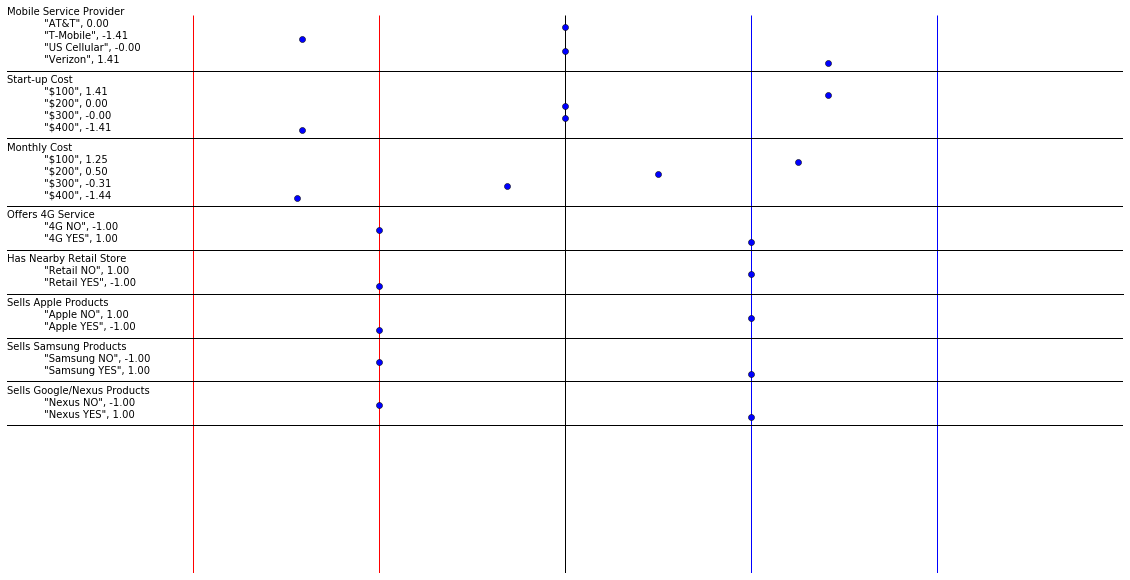

In [80]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1)

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['left'].set_color('none')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
#ax.yaxis.set_ticks_position('left')

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off

plt.gca().yaxis.set_major_locator(plt.NullLocator())
axes = plt.gca()
xr=70
axes.set_xlim([-3,3])
axes.set_ylim([-xr,xr])

plt.vlines(0,xr,0)
plt.vlines(0,-xr,0)

plt.vlines(1,xr,0, color='b')
plt.vlines(1,-xr,0, color='b')
plt.vlines(-1,xr,0, color='r')
plt.vlines(-2,xr,0, color='r')
plt.vlines(2,xr,0, color='b')
plt.vlines(-1,-xr,0, color='r')
plt.vlines(-2,-xr,0, color='r')
plt.vlines(2,-xr,0, color='b')



index = 0  # initialize for use in for-loop
xaxis_counter=xr
for item in conjoint_attributes:
    #ax.annotate(effect_name_dict[item], xy=(xaxis_counter, 0), xytext=(xaxis_counter, 1.5),arrowprops=dict(facecolor='black', shrink=0.05))
    plt.text(-3, xaxis_counter, effect_name_dict[item], rotation=0)
    xaxis_counter=xaxis_counter-3
    for level in range(len(level_name[index])):
        #print('       ',level_name[index][level], part_worth[index][level], 'standardized', part_worth[index][level]/np.std(part_worth[index]))       
        tt=[level_name[index][level], (part_worth[index][level]/np.std(part_worth[index]))]
        plt.text(-2.8,xaxis_counter,r'{0:}, {1:.2f}'.format(*tt))
        plt.plot(part_worth[index][level]/np.std(part_worth[index]), xaxis_counter, "o", color='b')
        #print (part_worth[index][level]/np.std(part_worth[index]))
        xaxis_counter=xaxis_counter-3
    plt.hlines(xaxis_counter+1, 10, 0)
    plt.hlines(xaxis_counter+1, -10, 0)

    #plt.vlines(0,xaxis_counter+1,-3, color='b')
    xaxis_counter=xaxis_counter-2
    index = index + 1

In [44]:
print (level_name[index][level]," ", part_worth[index][level]/np.std(part_worth[index]))

"AT&T"   9.16933995871e-14


In [22]:
dmatrix("C(x1,Sum) + x2", data)

DesignMatrix with shape (8L, 9L)
  Columns:
    ['Intercept',
     'C(x1, Sum)[S.-0.97727787987641102]',
     'C(x1, Sum)[S.-0.15135720829769789]',
     'C(x1, Sum)[S.0.40015720836722329]',
     'C(x1, Sum)[S.0.95008841752558937]',
     'C(x1, Sum)[S.0.9787379841057392]',
     'C(x1, Sum)[S.1.764052345967664]',
     'C(x1, Sum)[S.1.8675579901499675]',
     'x2']
  Terms:
    'Intercept' (column 0)
    'C(x1, Sum)' (columns 1:8)
    'x2' (column 8)
  (to view full data, use np.asarray(this_obj))

In [24]:
dmatrix("x1 + x2", data)

DesignMatrix with shape (8L, 3L)
  Intercept        x1        x2
          1   1.76405  -0.10322
          1   0.40016   0.41060
          1   0.97874   0.14404
          1   2.24089   1.45427
          1   1.86756   0.76104
          1  -0.97728   0.12168
          1   0.95009   0.44386
          1  -0.15136   0.33367
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'x2' (column 2)

In [26]:
data

{'a': ['a1', 'a1', 'a2', 'a2', 'a1', 'a1', 'a2', 'a2'],
 'b': ['b1', 'b2', 'b1', 'b2', 'b1', 'b2', 'b1', 'b2'],
 'x1': array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
        -0.97727788,  0.95008842, -0.15135721]),
 'x2': array([-0.10321885,  0.4105985 ,  0.14404357,  1.45427351,  0.76103773,
         0.12167502,  0.44386323,  0.33367433]),
 'y': array([ 1.49407907, -0.20515826,  0.3130677 , -0.85409574, -2.55298982,
         0.6536186 ,  0.8644362 , -0.74216502]),
 'z column': array([ 2.26975462, -1.45436567,  0.04575852, -0.18718385,  1.53277921,
         1.46935877,  0.15494743,  0.37816252])}

In [36]:
dmatrix("C(a, Sum)", patsy.balanced(a=3))

DesignMatrix with shape (3L, 3L)
  Intercept  C(a, Sum)[S.a1]  C(a, Sum)[S.a2]
          1                1                0
          1                0                1
          1               -1               -1
  Terms:
    'Intercept' (column 0)
    'C(a, Sum)' (columns 1:3)

In [37]:
import patsy
patsy.balanced(a=3)

{'a': ['a1', 'a2', 'a3']}

In [43]:
dmatrix("C(a,Sum)", patsy.balanced(a=3))

DesignMatrix with shape (3L, 3L)
  Intercept  C(a, Sum)[S.a1]  C(a, Sum)[S.a2]
          1                1                0
          1                0                1
          1               -1               -1
  Terms:
    'Intercept' (column 0)
    'C(a, Sum)' (columns 1:3)

In [61]:
for item in conjoint_attributes: print(item)
for item in conjoint_attributes:
    nlevels = len(list(np.unique(conjoint_data_frame[item])))
    level_name.append(list(np.unique(conjoint_data_frame[item])))
    begin = end 
    end = begin + nlevels - 1
    new_part_worth = list(main_effects_model_fit.params[begin:end])
    new_part_worth.append((-1) * sum(new_part_worth))  
    part_worth_range.append(max(new_part_worth) - min(new_part_worth))  
    part_worth.append(new_part_worth)

brand
startup
monthly
service
retail
apple
samsung
google


In [72]:
main_effects_model_fit.params
list(np.unique(conjoint_data_frame['brand']))
new_part_worth
part_worth_range
part_worth

[[1.6209256159527285e-14,
  -0.2500000000000091,
  -7.3274719625260332e-15,
  0.25000000000000022],
 [0.74999999999999556,
  2.2648549702353193e-14,
  -1.5099033134902129e-14,
  -0.75000000000000311],
 [4.9999999999999911,
  2.0000000000000075,
  -1.2500000000000002,
  -5.7499999999999982],
 [-1.749999999999998, 1.749999999999998],
 [0.25000000000000033, -0.25000000000000033],
 [0.25000000000000111, -0.25000000000000111],
 [-1.1249999999999993, 1.1249999999999993],
 [-0.749999999999999, 0.749999999999999]]

In [66]:
main_effects_model_fit.params

Intercept                          8.500000e+00
C(brand, Sum)[S."AT&T"]            1.620926e-14
C(brand, Sum)[S."T-Mobile"]       -2.500000e-01
C(brand, Sum)[S."US Cellular"]    -7.327472e-15
C(startup, Sum)[S."$100"]          7.500000e-01
C(startup, Sum)[S."$200"]          2.264855e-14
C(startup, Sum)[S."$300"]         -1.509903e-14
C(monthly, Sum)[S."$100"]          5.000000e+00
C(monthly, Sum)[S."$200"]          2.000000e+00
C(monthly, Sum)[S."$300"]         -1.250000e+00
C(service, Sum)[S."4G NO"]        -1.750000e+00
C(retail, Sum)[S."Retail NO"]      2.500000e-01
C(apple, Sum)[S."Apple NO"]        2.500000e-01
C(samsung, Sum)[S."Samsung NO"]   -1.125000e+00
C(google, Sum)[S."Nexus NO"]      -7.500000e-01
dtype: float64

In [71]:
np.unique(conjoint_data_frame['brand'])

array(['"AT&T"', '"T-Mobile"', '"US Cellular"', '"Verizon"'], dtype=object)

In [76]:
attribute_importance=[]
for item in part_worth_range:
    print(item)
    attribute_importance.append(round(100 * (item / sum(part_worth_range)),2))

0.5
1.5
10.75
3.5
0.5
0.5
2.25
1.5


In [80]:
attribute_importance
sum(part_worth_range)
part_worth_range

[0.50000000000000933,
 1.4999999999999987,
 10.749999999999989,
 3.499999999999996,
 0.50000000000000067,
 0.50000000000000222,
 2.2499999999999987,
 1.499999999999998]